<a href="https://colab.research.google.com/github/lanyu0322/PUS2020_LYu/blob/master/HW2/PhillyPark_Lan_Yu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [3]:
# -- Read in the data about the Philly parks
pparks = pd.read_csv("http://data-phl.opendata.arcgis.com/datasets/d52445160ab14380a673e5849203eb64_0.csv")

In [4]:
# -- show the shape of the parks file dataframe
pparks.shape

(522, 25)

In [5]:
# -- show the column names in the dataframe
pparks.columns

Index(['OBJECTID', 'PUBLIC_NAME', 'PARENT_NAME', 'NESTED', 'OFFICIAL_NAME',
       'LABEL', 'ALIAS', 'DPP_ASSET_ID', 'ADDRESS911', 'ZIPCODE',
       'ADDRESS_BRT', 'ALIAS_ADDRESS', 'ACREAGE', 'PROPERTY_CLASSIFICATION',
       'PPR_USE', 'PPR_DISTRICT', 'PPR_OPS_DISTRICT', 'COUNCIL_DISTRICT',
       'POLICE_DISTRICT', 'CITY_SCALE_MAPS', 'LOCAL_SCALE_MAPS',
       'PROGRAM_SITES', 'COMMENTS', 'Shape__Area', 'Shape__Length'],
      dtype='object')

In [6]:
# -- show the beginning of the dataframe (the first 5 rows)
pparks.head(5)


,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS911,ZIPCODE,ADDRESS_BRT,ALIAS_ADDRESS,ACREAGE,PROPERTY_CLASSIFICATION,PPR_USE,PPR_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
0,1,William H (Billy) Markward Memorial Playground,Schuylkill River Park,Y,William H. (Billy) Markward Memorial Playground,Markward,NaN,1903,400 S TANEY ST,19146,"400-16 S TANEY ST, 338-46 S 26TH ST, 300 S 26T...",400-16 S TANEY ST;Pine & Taney;338-46 S 26TH S...,3.379158,NEIGHBORHOOD_PARK,RECREATION_SITE,7,"5, 7",2,9,Y,Y,Y,NaN,23295.664062,892.868012
1,2,Schuylkill Banks,Schuylkill Banks,N,NaN,Schuylkill Banks,NaN,2794,400 S TANEY ST,19103,NaN,400-16 S TANEY ST,14.717314,NEIGHBORHOOD_PARK,GREENWAY_PARKWAY,7,"5, 7","2, 5","9, 17",Y,Y,N,Bill 160113 (4/14/16) -South of South St Bridge,101477.179688,9300.670289
2,3,Schuylkill River Park,Schuylkill River Park,N,NaN,Schuylkill River Park,NaN,2992,400 S TANEY ST,19146,"400-16 S TANEY ST, 338-46 S 26TH ST, 300 S 26T...","Pine & Taney;400-16 S TANEY ST, 338-46 S 26TH ...",7.327000,NEIGHBORHOOD_PARK,RECREATION_SITE,7,"5, 7",2,9,Y,Y,N,NaN,50512.582031,1259.304657
3,4,Frankford Boat Launch,Frankford Boat Launch,N,Frankford Boat Launch,Frankford Boat Launch,PA Fish & Boat;Frankford Arsenal Boat Launch,3090,5625 TACONY ST,19137,5625 TACONY ST,5650 Tacony St,19.398075,NEIGHBORHOOD_PARK,BOATHOUSE_LAUNCH,2,2,6,15,Y,Y,N,NaN,133961.171875,1641.529044
4,5,Orthodox Street Park,Orthodox Street Park,N,NaN,Orthodox,Orthodox Street Parcel; Bridesburg Riverfront ...,3091,3101 ORTHODOX ST,19137,3101 ORTHODOX ST,NaN,16.229629,NEIGHBORHOOD_PARK,UNDEVELOPED,5,2,6,15,Y,Y,N,Officially acquired from PAID in 10/2019. Doc ...,112026.734375,1679.085206


In [7]:
# -- show the end of the dataframe (the last 5 rows)
pparks.tail(5)

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS911,ZIPCODE,ADDRESS_BRT,ALIAS_ADDRESS,ACREAGE,PROPERTY_CLASSIFICATION,PPR_USE,PPR_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
517,518,Sedgely and Fletcher Warehouse,Sedgely and Fletcher Warehouse,N,NaN,Sedgely Warehouse,Sedgley Storeroom;Maintenance Warehouse,99999,2528 W SEDGLEY AVE,19132,2528-34 W SEDGLEY AVE,W Sedgley Ave & N 26th St;2528-34 W SEDGLEY AVE,0.773902,NEIGHBORHOOD_PARK,OPERATIONS,6,6,5,22,N,Y,N,School District leases to PPR.,5341.640625,356.178092
518,519,Fox Chase - Lorimer Trail Greenway (Rhawn),Fox Chase - Lorimer Trail Greenway (Rhawn),N,NaN,Fox Chase - Lorimer Greenway,NaN,99999,439 RHAWN ST,19111,NaN,Rhawn St and Elberon Ave;8217 BURHOLME AVE,3.589356,NEIGHBORHOOD_PARK,UNDEVELOPED,1,1,10,7,Y,Y,N,No Public Access. Undeveloped Land awaiting Fo...,24840.667969,2152.448099
519,520,Bartrams Mile Trail Greenway,Bartrams Mile Trail Greenway,N,NaN,Bartrams Trail Greenway,Bartram's Mile; Bartrams South,0,NaN,19143,NaN,NaN,9.217030,NEIGHBORHOOD_PARK,GREENWAY_PARKWAY,9,8,3,"12,18",Y,N,N,In Development,63509.933594,2635.375719
520,521,Loretto and Gilham Triangle,Loretto and Gilham Triangle,N,NaN,Loretto and Gilham,Cranford Ave andd Magee Ave Traffic Island; No...,245,1385 GILHAM ST,19111,Registry - 144N070092,6540 LORETTO AVE,0.161596,POCKET_PARK,BREEZEWAY_ISLAND,1,2,9,2,Y,Y,N,NaN,1116.867188,144.694698
521,522,Rail Park,Rail Park,N,The Rail Park,Rail Park,NaN,99999,1250 NOBLE ST,19123,NaN,1136 CALLOWHILL ST,0.872112,NEIGHBORHOOD_PARK,GREENWAY_PARKWAY,10,5,1,6,Y,Y,N,Elevated former railway.,6009.941406,825.079151


In [12]:
# -- meausre the central tendency of the Philly park sizes
# -- show the median size of the dataframe 
meandf = pparks.mean()
mediandf = pparks.median()
meandf

OBJECTID            261.500000
DPP_ASSET_ID       3761.093870
ZIPCODE           19021.597701
ACREAGE              23.238296
Shape__Area      160576.663539
Shape__Length      1813.954186
dtype: float64

In [13]:
mediandf

OBJECTID           261.500000
DPP_ASSET_ID      1846.500000
ZIPCODE          19132.000000
ACREAGE              3.593854
Shape__Area      24832.205078
Shape__Length      707.694865
dtype: float64

In [9]:
meanps = pparks["ACREAGE"].mean()
medianps = pparks["ACREAGE"].median()
print("the mean value of park size is {meanps} Acres".format(meanps = round(meanps, 3)))
print("the median value of park size is {medianps} Acres".format(medianps = round(medianps, 3)))

the mean value of park size is 23.238 Acres
the median value of park size is 3.594 Acres


The value of mean is larger than the median of Philly area. This indicates that park size data could be positive skew, which has a few relatively high values

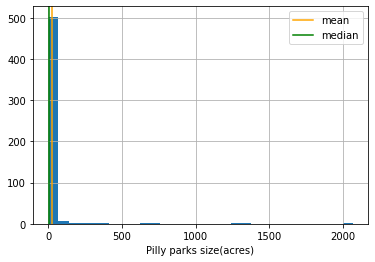

In [ ]:
# -- visualize a histogram of the park size. 
# -- you can use the method of the ACREAGE column .hist()
# -- choose an appropriate number of bins with the argument bins=
# -- overplot on the histogram the mean and the median of the distribution
ax = pparks.ACREAGE.hist(bins = 30)
ax.axvline(x=meanps, c="orange", label="mean")
ax.axvline(x=medianps, c="green", label="median")
ax.set_xlabel("Pilly parks size(acres)")
ax.legend();


Figure Caption: the above figure shows the distribution of Pilly parks size. The orange line indicates the mean value of the Pilly parks size and the green line represents the median of the Pilly parks size. The x_label represents the parks' size and the unit is acre. y_label shows the frequence. According to the 
plot, the largest park size is around 2000 acres. 
In this histogram, we could see that mean value is larger than the median value, which means overall distribution of Pilly parks size is positive skew and the mass of the distribution is concentrated on the left of the figure. Thus, overall in Pilly, only a small portion of parks' size are larger than 250 acres. 



In [ ]:
stdps = pparks["ACREAGE"].std()
print("the standard deviation of park size is {stdps} Acres".format(stdps = round(stdps, 3)))


the standard deviation of park size is 131.883 Acres


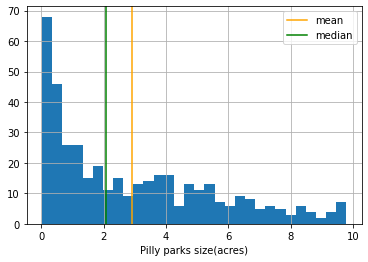

In [ ]:
# select only a subset of the parks: the pasks smaller than 10 acres
sub = pparks[pparks["ACREAGE"] < 10]
meansub = sub["ACREAGE"].mean()
mediansub = sub["ACREAGE"].median()
ax = sub.ACREAGE.hist(bins = 30)
ax.axvline(x=meansub, c="orange", label="mean")
ax.axvline(x=mediansub, c="green", label="median")
ax.set_xlabel("Pilly parks size(acres)")
ax.legend();

Figure Caption: the above figure shows the distribution of the Pilly parks which are less than 10 acres. The orange line indicates the mean value of the Pilly parks' size (around 3 Acres) and the green line represents the median of the Pilly parks' size(around 2 Acres). The x_label represents the parks' size and the unit is Acre. y_label shows the frequence.
In this histogram, we could see that mean value is larger than the median value, which means the overall distribution of Pilly parks size is positive skew and the mass of the distribution(the distribution of Pilly parks' size) is concentrated on the left of the figure. It has a few relatively high values.

In [ ]:
sub.head()

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS911,ZIPCODE,ADDRESS_BRT,ALIAS_ADDRESS,ACREAGE,PROPERTY_CLASSIFICATION,PPR_USE,PPR_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
0,1,William H (Billy) Markward Memorial Playground,Schuylkill River Park,Y,William H. (Billy) Markward Memorial Playground,Markward,NaN,1903,400 S TANEY ST,19146,"400-16 S TANEY ST, 338-46 S 26TH ST, 300 S 26T...",400-16 S TANEY ST;Pine & Taney;338-46 S 26TH S...,3.379158,NEIGHBORHOOD_PARK,RECREATION_SITE,7,"5, 7",2,9,Y,Y,Y,NaN,23295.664062,892.868012
2,3,Schuylkill River Park,Schuylkill River Park,N,NaN,Schuylkill River Park,NaN,2992,400 S TANEY ST,19146,"400-16 S TANEY ST, 338-46 S 26TH ST, 300 S 26T...","Pine & Taney;400-16 S TANEY ST, 338-46 S 26TH ...",7.327000,NEIGHBORHOOD_PARK,RECREATION_SITE,7,"5, 7",2,9,Y,Y,N,NaN,50512.582031,1259.304657
15,16,Whitby Avenue Playground,Cobbs Creek Park,Y,NaN,Whitby,,1372,1300 COBBS CREEK PKY,19143,NaN,NaN,5.167033,NEIGHBORHOOD_PARK,MISC_PARK,8,8,3,12,Y,Y,N,NaN,35613.878906,906.065942
16,17,Holme Avenue Field,Pennypack Park,Y,NaN,NaN,,3088,2761 HOLME AVE,19152,NaN,NaN,1.158622,NEIGHBORHOOD_PARK,ATHLETIC_OTHER,1,1,6,8,N,N,N,NaN,8013.515625,453.300062
17,18,29th and Passyunk Park,29th and Passyunk Park,N,NaN,29th and Passyunk,,432,2827 W PASSYUNK AVE,19145,2827 W PASSYUNK AVE,Newkirk & Passyunk,0.556027,NEIGHBORHOOD_PARK,MISC_PARK,9,7,2,1,Y,Y,N,Owned by PennDOT,3830.242188,247.032048


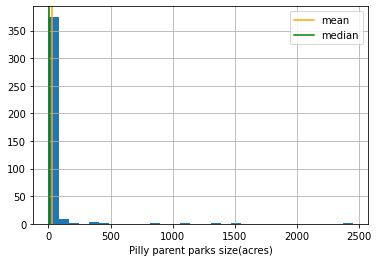

In [ ]:
# -- Challenge
ppark_pn = pparks.groupby("PARENT_NAME").sum().reset_index()
meanpn = ppark_pn["ACREAGE"].mean()
medianpn = ppark_pn["ACREAGE"].median()
ax = ppark_pn["ACREAGE"].hist(bins = 30)
ax.axvline(x=meanpn, c="orange", label="mean")
ax.axvline(x=medianpn, c="green", label="median")
ax.set_xlabel("Pilly parent parks size(acres)")
ax.legend();


Figure Caption: the above figure shows the distribution of the Pilly "parent" park(the parks listed in each row in original dataset are in some cases subsets of larger parks). The orange line indicates the mean value of the Pilly parks'size and the green line represents the median of the Pilly parks' size. The x_label represents the parks' size and the unit is acre. y_label shows the frequence.

In this histogram, we could see that mean value is larger than the median value, which means the overall distribution of Pilly parks size is positive skew and the mass of the distribution(the distribution of Pilly parks' size) is concentrated on the left of the figure. It has a few relatively high values.

Difference: compared to the distribution of the Pilly park, the distribution of the Pilly "parent" park has more large size park, for example, more parks are concentrating between 1000 to 1500. The largest park size is around 2500 acres in the histogram of the Pilly "parent" park and the largest park size in the histogram of the Pilly parks is around 2000 acres. This also indicated in the number of frequence. In the Pilly "parent" park, the first bar has frequence around 375, but in the previous plot, the first bar is around 500. 

In [ ]:
ppark_pn.head()

,PARENT_NAME,OBJECTID,DPP_ASSET_ID,ZIPCODE,ACREAGE,Shape__Area,Shape__Length
0,10th and Lemon Playground,40,2914,19123,0.218346,1505.957031,169.462813
1,11th and Cecil B Moore Playground,183,1135,19122,5.181687,35754.375000,755.891229
2,12th and Cambria Playground,263,1800,19133,2.337384,16136.882812,542.995987
3,17th and Carpenter Play Lot,514,99999,19146,0.282406,1946.351562,184.887743
4,18th and Jackson War Memorial,390,1215,19145,0.083384,574.429688,148.363162


In [ ]:
stdps = ppark_pn["ACREAGE"].std()
print("the standard deviation of park size is {stdps}".format(stdps = round(stdps, 3)))

the standard deviation of park size is 179.682


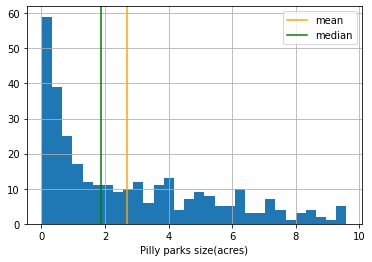

In [ ]:
# select only a subset of the parks: the pasks smaller than 10 acres
sub_pn = ppark_pn[ppark_pn["ACREAGE"] < 10]
meansub_pn = sub_pn["ACREAGE"].mean()
mediansub_pn = sub_pn["ACREAGE"].median()
ax = sub_pn.ACREAGE.hist(bins = 30)
ax.axvline(x=meansub_pn, c="orange", label="mean")
ax.axvline(x=mediansub_pn, c="green", label="median")
ax.set_xlabel("Pilly parks size(acres)")
ax.legend();

Figure Caption: the above figure shows the distribution of the Pilly "parent" park which are less than 10 acres. The orange line indicates the mean value of the Pilly parks'size and the green line represents the median of the Pilly parks' size. The x_label represents the parks' size and the unit is acres. y_label shows the frequence. 

In this histogram, we could see that mean value is larger than the median value, which means the overall distribution of Pilly "parent" parks size is positive skew and the mass of the distribution(the distribution of Pilly "parent" parks' size) is concentrated on the left of the figure. 

Difference:  It is obvious that the number of "parent" parks with size less than 10 acres is smaller than it in the previous figure. Expecially for the first pillar (the frequency has decreased from 70 to 60). Moreover, the mean value of park size has changed from 2.90 acres to 2.67 acres, the median value of park size has changed from 2.05 acres to 1.87 acres.

In [ ]:
sub_pn.head()

,PARENT_NAME,OBJECTID,DPP_ASSET_ID,ZIPCODE,ACREAGE,Shape__Area,Shape__Length
0,10th and Lemon Playground,40,2914,19123,0.218346,1505.957031,169.462813
1,11th and Cecil B Moore Playground,183,1135,19122,5.181687,35754.375000,755.891229
2,12th and Cambria Playground,263,1800,19133,2.337384,16136.882812,542.995987
3,17th and Carpenter Play Lot,514,99999,19146,0.282406,1946.351562,184.887743
4,18th and Jackson War Memorial,390,1215,19145,0.083384,574.429688,148.363162
